In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/the-boston-houseprice-data/boston.csv


In [2]:
# Import additional required libraries

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# Import & read .csv file containing data

In [5]:
housing = pd.read_csv("../input/the-boston-houseprice-data/boston.csv")
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [6]:
# Collecting information about the data

In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [8]:
housing.shape

(506, 14)

In [9]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [10]:
# Visualizing the relation between some of the Inputs to the Outputs

<AxesSubplot:xlabel='ZN', ylabel='MEDV'>

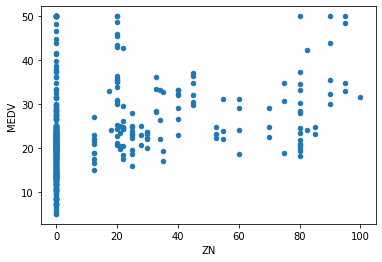

In [11]:
housing.plot(x='ZN',y='MEDV',kind='scatter')

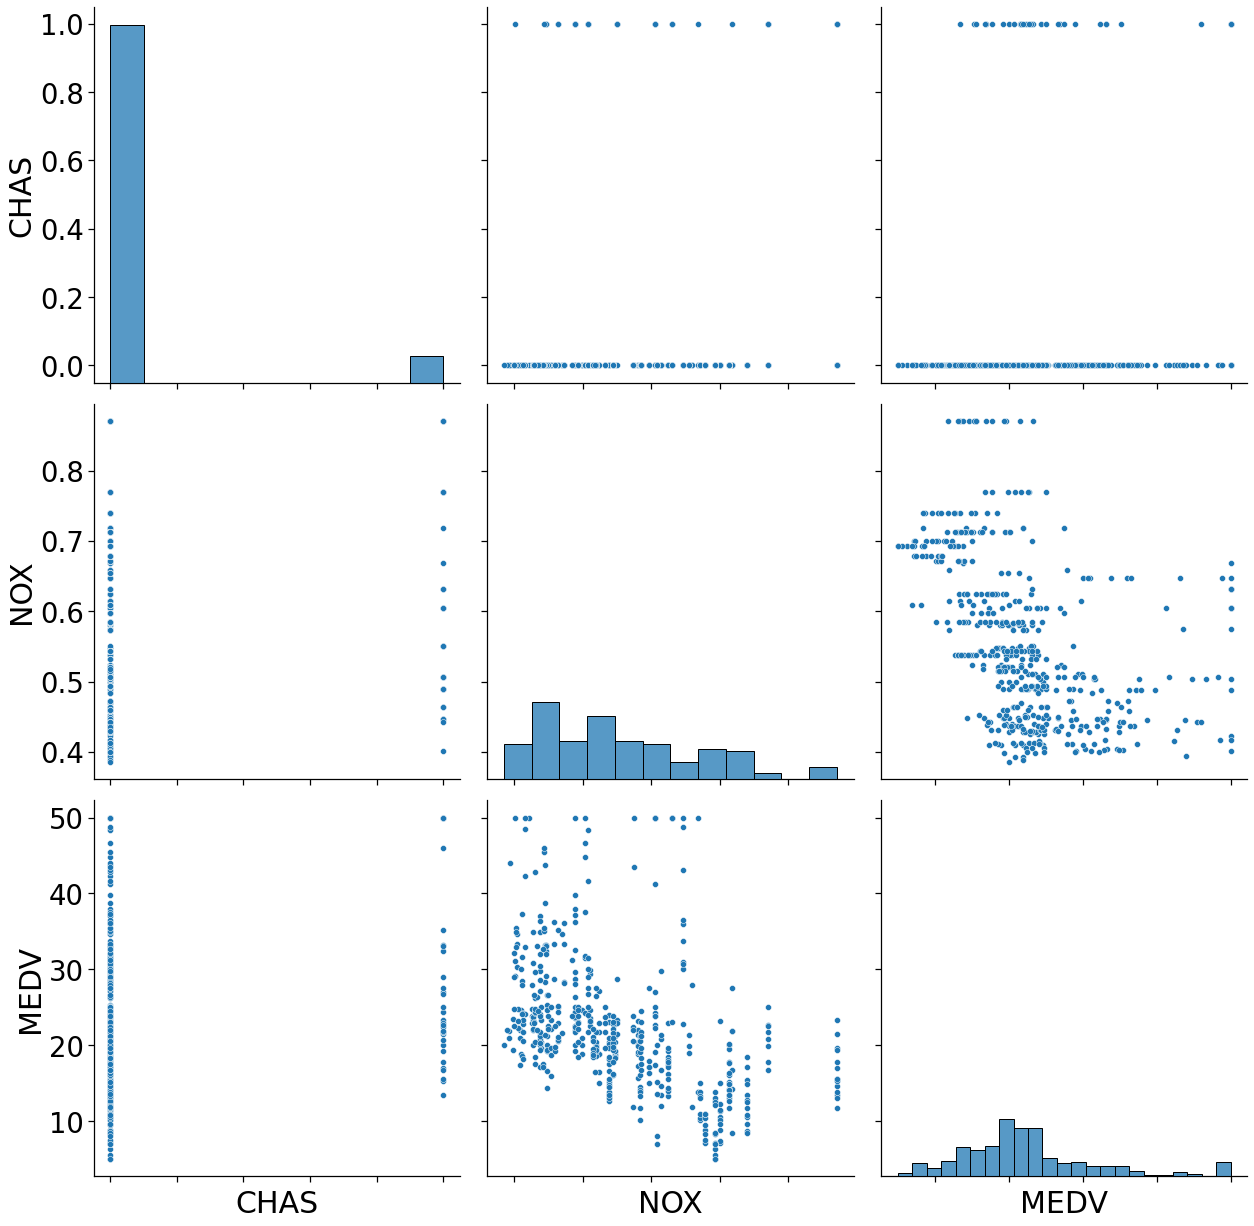

In [12]:
with sns.plotting_context("notebook",font_scale=2.5):
    g = sns.pairplot(housing[['CHAS','NOX','MEDV']], palette='tab20',height=6)
g.set(xticklabels=[]);
    

In [13]:
# Defining Inputs (X)

In [14]:
X = housing[['CRIM','ZN','PTRATIO','NOX','INDUS','RM','AGE','TAX','LSTAT','B','DIS','RAD',]]
X.head()

,CRIM,ZN,PTRATIO,NOX,INDUS,RM,AGE,TAX,LSTAT,B,DIS,RAD
0,0.00632,18.0,15.3,0.538,2.31,6.575,65.2,296.0,4.98,396.90,4.0900,1
1,0.02731,0.0,17.8,0.469,7.07,6.421,78.9,242.0,9.14,396.90,4.9671,2
2,0.02729,0.0,17.8,0.469,7.07,7.185,61.1,242.0,4.03,392.83,4.9671,2
3,0.03237,0.0,18.7,0.458,2.18,6.998,45.8,222.0,2.94,394.63,6.0622,3
4,0.06905,0.0,18.7,0.458,2.18,7.147,54.2,222.0,5.33,396.90,6.0622,3


In [15]:
# Defining Output (Y)

In [16]:
Y=housing['MEDV']
Y.tail()

501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, dtype: float64

In [17]:
# Splitting the data to load into the model 

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.7 , random_state=100)
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
(354, 12)
(354,)
(152, 12)
(152,)


In [19]:
# Applying Linear Regression to the splitted data

In [20]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [21]:
# Printing the values of intercept and co-efficients of Linear Regression model

In [22]:
print(lr.intercept_)
print(lr.coef_)

33.04133504799158
[-8.30397386e-02  4.12816032e-02 -9.27810884e-01 -1.31771905e+01
  1.16078895e-02  3.92173215e+00 -9.87200871e-03 -1.56769711e-02
 -4.44398565e-01  1.10108858e-02 -1.39472083e+00  3.12421084e-01]


In [23]:
# Predicting the Output by training the model on the Inputs

In [24]:
y_pred = lr.predict(X_test)
type(y_pred)

numpy.ndarray

In [25]:
# Generating Graphs to visualize the Predicted and Actual Values

In [26]:
y_test.shape 

(152,)

Text(0, 0.5, 'Sales')

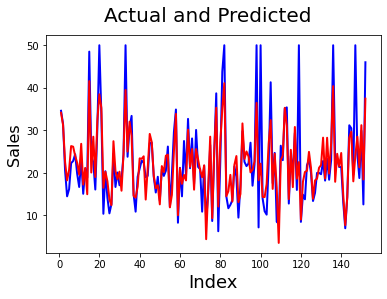

In [27]:
c = [i for i in range(1,153)]         # generating index 
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2)
plt.plot(c,y_pred, color="red",  linewidth=2)
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Sales', fontsize=16)                               #Y-label

Text(0, 0.5, 'Test Y - Predicted Y')

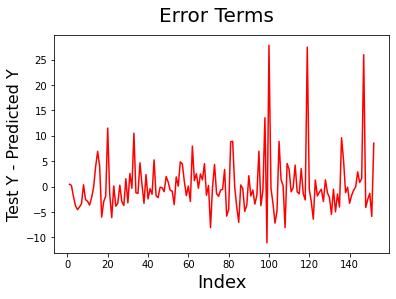

In [28]:
c = [i for i in range(1,153)]         
fig = plt.figure()
plt.plot(c,y_test-y_pred, color="red")
fig.suptitle('Error Terms', fontsize=20)             
plt.xlabel('Index', fontsize=18)                        
plt.ylabel('Test Y - Predicted Y', fontsize=16)          

In [29]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 30.191774337351955
r_square_value : 0.7019125360361822


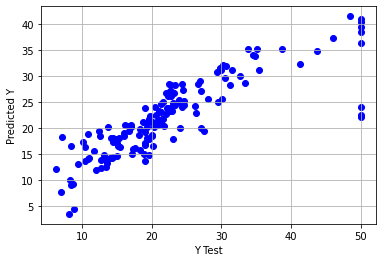

In [30]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred,c='blue')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.grid()